<a href="https://colab.research.google.com/github/Muyikem21/Sunday_INFO5502_Spring2022/blob/main/INFO_5502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Id,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageCars,YrSold,SalePrice
0,1,8450,7,706,856,1710,2,2008,208500
1,2,9600,6,978,1262,1262,2,2007,181500
2,3,11250,7,486,920,1786,2,2008,223500
3,4,9550,7,216,756,1717,3,2006,140000
4,5,14260,8,655,1145,2198,3,2008,250000


# Output 1: Variable Summary of StatExplore Node.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.00,2.0,2.00,4.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.00,2008.0,2009.00,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0


In [ ]:
df.skew()

Id               0.000000
LotArea         12.207688
OverallQual      0.216944
BsmtFinSF1       1.685503
TotalBsmtSF      1.524255
GrLivArea        1.366560
GarageCars      -0.342549
YrSold           0.096269
SalePrice        1.882876
AdjSalePrice     1.875281
dtype: float64

# Data Cleaning and Preparation

# Dependent / Target Variable

In [ ]:
year_start = 2006
avg_inf = 2.23 / 100
df['AdjSalePrice'] = df['SalePrice'] * (1 + avg_inf) ** (df['YrSold'] - year_start)

Text(0.5, 0, 'AdjSalePrice')

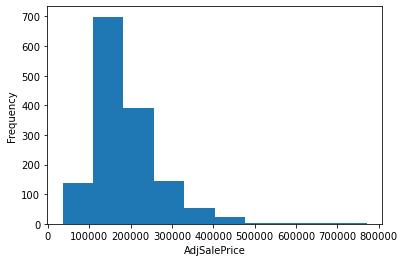

In [ ]:
df['AdjSalePrice'].plot(
    kind='hist'
)
plt.xlabel('AdjSalePrice')

Text(0.5, 1.0, 'Boxplot of Adjusted Sale Price')

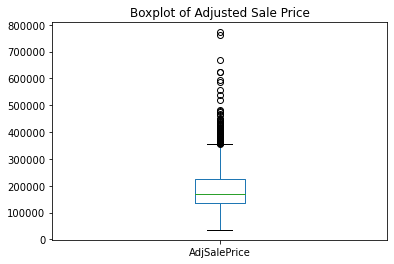

In [ ]:
df['AdjSalePrice'].plot(
    kind='box'
)
plt.xlabel('')
plt.title('Boxplot of Adjusted Sale Price')

Text(0.5, 0, 'Transformed AdjSalePrice')

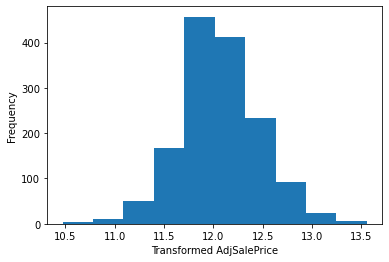

In [ ]:
df['AdjSalePrice'].map(np.log).plot(
    kind='hist'
)
plt.xlabel('Transformed AdjSalePrice')

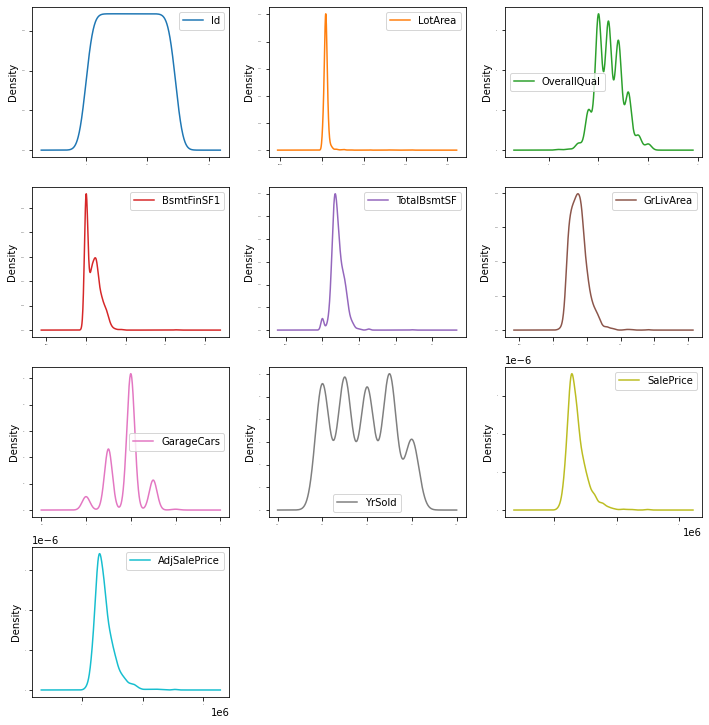

In [ ]:
df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()

# Checking for Missing Values

In [ ]:
df.isnull().sum()

Id              0
LotArea         0
OverallQual     0
BsmtFinSF1      0
TotalBsmtSF     0
GrLivArea       0
GarageCars      0
YrSold          0
SalePrice       0
AdjSalePrice    0
dtype: int64

# Transforming the LotArea using natural logarithm

In [ ]:
df['LotArea'].map(np.log10).skew()  

-0.13799380869581324

# Multiple Linear Regression Model

# Correlation

In [ ]:
from pandas.plotting import scatter_matrix


In [ ]:
df2= df[['LotArea', 'OverallQual', 'BsmtFinSF1','TotalBsmtSF', 'GrLivArea', 'GarageCars', 'YrSold'  ]]

In [ ]:
df2.corr()

,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageCars,YrSold
LotArea,1.000000,0.105806,0.214103,0.260833,0.263116,0.154871,-0.014261
OverallQual,0.105806,1.000000,0.239666,0.537808,0.593007,0.600671,-0.027347
BsmtFinSF1,0.214103,0.239666,1.000000,0.522396,0.208171,0.224054,0.014359
TotalBsmtSF,0.260833,0.537808,0.522396,1.000000,0.454868,0.434585,-0.014969
GrLivArea,0.263116,0.593007,0.208171,0.454868,1.000000,0.467247,-0.036526
GarageCars,0.154871,0.600671,0.224054,0.434585,0.467247,1.000000,-0.039117
YrSold,-0.014261,-0.027347,0.014359,-0.014969,-0.036526,-0.039117,1.000000


<Figure size 1440x864 with 0 Axes>

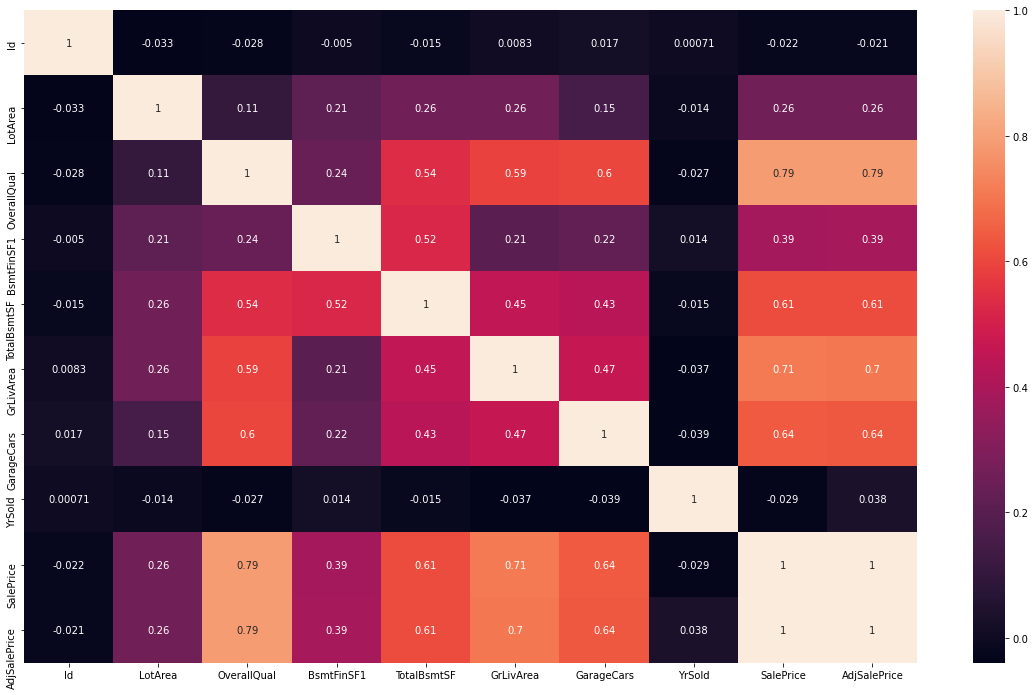

In [ ]:
plt.figure(figsize =(20,12))
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(df, test_size=.3)
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
X=df.drop(['SalePrice', ], axis=1).values
Y=df['SalePrice'].values

In [ ]:
print(Y)

[208500 181500 223500 ... 266500 142125 147500]


In [ ]:
print(X)

[[1.00000000e+00 8.45000000e+03 7.00000000e+00 ... 2.00000000e+00
  2.00800000e+03 2.17902785e+05]
 [2.00000000e+00 9.60000000e+03 6.00000000e+00 ... 2.00000000e+00
  2.00700000e+03 1.85547450e+05]
 [3.00000000e+00 1.12500000e+04 7.00000000e+00 ... 2.00000000e+00
  2.00800000e+03 2.33579244e+05]
 ...
 [1.45800000e+03 9.04200000e+03 7.00000000e+00 ... 1.00000000e+00
  2.01000000e+03 2.91078854e+05]
 [1.45900000e+03 9.71700000e+03 5.00000000e+00 ... 1.00000000e+00
  2.01000000e+03 1.55232954e+05]
 [1.46000000e+03 9.93700000e+03 5.00000000e+00 ... 1.00000000e+00
  2.00800000e+03 1.54151850e+05]]


# Spilt into Input/Output Array into Training/Testing Datasets

In [ ]:
 # Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

# Building the model

# Checking for variables' contribution to the model using OLS method

In [ ]:
mlr=smf.ols(formula="SalePrice~LotArea+OverallQual+BsmtFinSF1+TotalBsmtSF+GrLivArea+GarageCars+YrSold",data=df).fit()

In [ ]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     908.0
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:55:05   Log-Likelihood:                 4244.7
No. Observations:                1460   AIC:                            -8473.
Df Residuals:                    1452   BIC:                            -8431.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8759      4.001      1.219      

The results show that both r square and adjusted r square is 81%. It simply means only 81 percent of the 
variation in the model is explained by the independent variables. This is good compared to the overfitting.